# 인공 신경망_분류

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 scaling
from sklearn.preprocessing import StandardScaler

#데이터 분할
from sklearn.model_selection import train_test_split

#분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

#confusion matrix
from sklearn.metrics import confusion_matrix

# import graphviz
# from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [7]:
matplotlib.rc('font', family = 'NanumGothic')

### step1. 데이터 구성하기

In [10]:
df_raw = pd.read_csv("~/Desktop/coding/postech/Postech_Academy/Practice/data/유방암.csv", engine="python",encoding="EUC-KR")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### - 결측치 제거

In [11]:
#결측지 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

: 결측치가 하나도 없다.


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

:범주형 데이터가 없으므로, 더미변수를 새롭게 추가할 필요 없음을 확인할 수 있다.

In [13]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace=False)

:설명변수와 목표변수를 분리한다.

### - 데이터 분할

In [14]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


: df_test_x, df_test_y(test data)를 떼어낸다.

In [15]:
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_valid_x.shape))
print("validation data Y size : {}".format(df_valid_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


: df_train_x, df_train_y(training data), df_valid_x, df_valid_y(validation data)로 분리한다.

### step2: MLPClassifier 모델 생성

In [16]:
#모델 생성
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on validation set : {:.3f}'.format(nn_uncustomized.score(df_valid_x, df_valid_y)))

Accuracy on training set : 0.934
Accuracy on validation set : 0.912


In [17]:
nn_uncustomized

MLPClassifier(random_state=1234)

### MLPClassifier 모델 parameter 변경

### - Hidden layer : 은닉층 변경

In [18]:
#train 및 test 설명력 결과 저장
train_accuracy = []
valid_accuracy = []

#hidden_layer_sizes : 은닉층 노드 수 변경 (20,40,60,80,100,120,140,160)
para_hidden= [hidden * 20 for hidden in range(1,9)]
for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = v_hidden)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_valid_x, df_valid_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['Validaccuracy'] = valid_accuracy
df_accuracy_hidden.round(3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,Trainaccuracy,Validaccuracy
0,20,0.630,0.637
1,40,0.890,0.871
2,60,0.938,0.906
3,80,0.930,0.924
4,100,0.934,0.912
5,120,0.930,0.906
6,140,0.938,0.912
7,160,0.916,0.901


### - Hidden layer : 은닉층 변경도 결과 

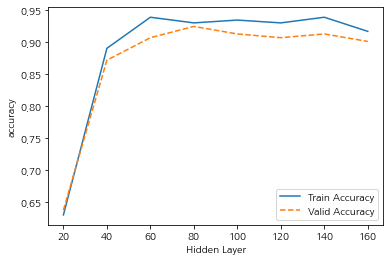

In [19]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, valid_accuracy, linestyle = "--", label = 'Valid Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

### - Activation: 활성화 함수 변경

In [20]:
#train 및 test 설명력 결과 저장
train_accuracy = []
valid_accuracy = []

#activation 변경
para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(random_state = 1234 , 
             activation = v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_valid_x, df_valid_y))
    
#결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['Trainaccuracy'] = train_accuracy
df_accuracy_function['Validaccuracy'] = valid_accuracy
df_accuracy_function.round(3)

,ActivationFunction,Trainaccuracy,Validaccuracy
0,logistic,0.921,0.906
1,tanh,0.934,0.912
2,relu,0.934,0.912


### - Activation: 활성화 함수 변경 결과

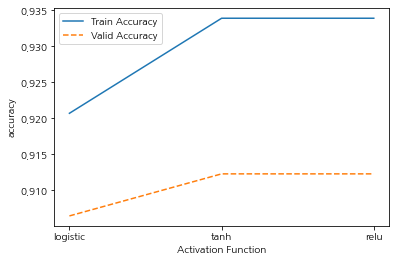

In [21]:
#모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_function, valid_accuracy, linestyle = "--", label = 'Valid Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('accuracy')
plt.legend()

### - Standardscaler: 설명변수 scale 변경


In [22]:
#scale 변환 - Standardscaler: 설명변수 scale 변경
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [31]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state = 1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('test data X size: {}'.format(df_scaled_test_x.shape))

train data X size: (398, 30)
test data X size: (171, 30)


In [32]:
#데이터 분할
df_scaled_train_x, df_scaled_valid_x = train_test_split(df_scaled_train_x, test_size=3/7, random_state = 1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('valid data X size: {}'.format(df_scaled_valid_x.shape))

train data X size: (227, 30)
valid data X size: (171, 30)


### scale 조절 후 MLPClassifier 모델 재실행
### - scale 이 조정된 데이터로 새로운 모델 생성

In [33]:
#scale 조절 후 MLPClassifier 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on validation set: {:.3f}'.format(nn_scaled.score(df_scaled_valid_x, df_valid_y)))

Accuracy on training set: 0.996
Accuracy on validation set: 0.959


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## - Hidden Layer: 은닉층 변경

In [34]:
#train 및 test 설명력 결과 저장
train_accuracy = []
valid_accuracy = []

#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden= [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = (v_hidden,v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['Validaccuracy'] = valid_accuracy
df_accuracy_hidden.round(3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,Trainaccuracy,Validaccuracy
0,20,0.996,0.965
1,40,0.996,0.977
2,60,1.000,0.965
3,80,1.000,0.977
4,100,1.000,0.971
5,120,1.000,0.953
6,140,1.000,0.965
7,160,1.000,0.953
8,180,1.000,0.959
9,200,1.000,0.953


### - Hidden Layer: 은닉층 변경 결과

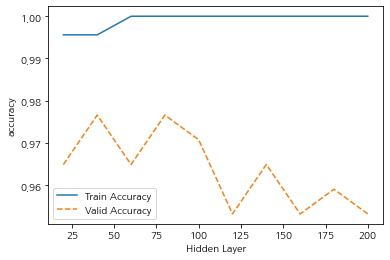

In [35]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, valid_accuracy, linestyle = "--", label = 'Valid Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

In [36]:
hidden_layer_sizes = 40

### - Activation: 활성화 함수 변경

In [37]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; valid_accuracy=[]
#activation 변경
para_function=["logistic","tanh","relu"]
for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x,df_valid_y))
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['MinSamplesSplit']= para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['ValidAccuracy']=valid_accuracy
# Activation function별 정확도 테이블
df_accuracy_function.round(3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,MinSamplesSplit,TrainAccuracy,ValidAccuracy
0,logistic,0.996,0.965
1,tanh,1.000,0.959
2,relu,1.000,0.977


### - Activation: 활성화 함수 변경 결과

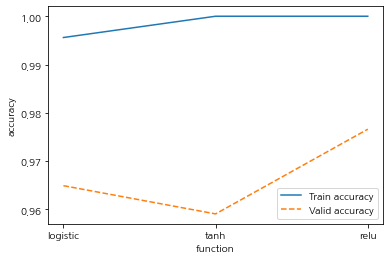

In [38]:
# Activation function별 정확도 그래프 확인
plt.plot(para_function,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_function,valid_accuracy,linestyle='--',label='Valid accuracy')
plt.ylabel('accuracy')
plt.xlabel('function')
plt.legend()
# Activation Function 지정(임의)
activation='relu'

In [39]:
#Activation Function 지정 (임의)
activation = 'relu'

In [40]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]
valid_accuracy=[]
# solver 변경
para_solver=['lbfgs','sgd','adam']
for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver,activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x,df_valid_y))
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Estimators']=para_solver
df_accuracy_solver['TrainScore']=train_accuracy
df_accuracy_solver['ValidScore']=valid_accuracy
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Estimators,TrainScore,ValidScore
0,lbfgs,1.000,0.947
1,sgd,0.996,0.971
2,adam,1.000,0.977


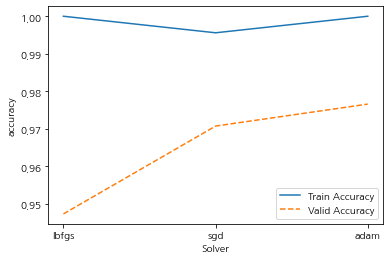

In [42]:
# 정확도 그래프 표현
plt.plot(para_solver,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_solver,valid_accuracy,linestyle='--',label='Valid Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

In [43]:
#Solver 지정(임의)
solver = 'adam'

### - mini batch 변경

In [44]:
# train 및 test정확도 결과 저장용
train_accuracy = []
valid_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]
for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation="relu", hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["ValidAccuracy"] = valid_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,ValidAccuracy
0,20,1.0,0.971
1,40,1.0,0.971
2,60,1.0,0.971
3,80,1.0,0.971
4,100,1.0,0.977
5,120,1.0,0.971
6,140,1.0,0.971
7,160,1.0,0.971
8,180,1.0,0.965


### - mini batch 변경 결과

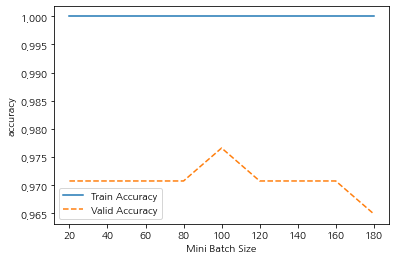

In [45]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

In [46]:
# 배치 사이즈 지정
batch_size = 100

In [47]:
#최종모델
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = 'relu', solver = 'adam', 
                batch_size =100 , random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

#평가
y_pred = nn_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print('Accuracy on training set : {:3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on test set : {:3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

#confusion matrix
print('Confusion matrix: \n {}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000000
Accuracy on test set : 0.947368
Confusion matrix: 
 [[103   2]
 [  7  59]]


# 결론

- 꽤 괜찮은 성능을 보이며, 활용할 수 있을 것으로 판단된다. test set에서 91.8%의 높은 정확도를 보인다. 또한, 우리가 주목해야 할 부분은 바로 Confusion Matrix 중에서도 실제로 0(악성)이지만, 1(양성)으로 판단한 비율이 2/103 = 0.02(=2%)이다. 따라서 100%는 아니지만, 암 진단에 사용되도 괜찮은 모델로 판단된다.

- 정밀도(precision) : 예측 긍정(참)에서 실제 긍정(참)의 비율 (TP/(TP+FP))
- 재현율(recall) : 실제 긍정(참)에서 예측 긍정(참)의 비율 (TP/(TP+FN))

하지만, 실제로는 양성(1)인데, 악성(0)으로 판단할 확률이 7/59 = 0.119(=11.9%)로, 악성이 아닌데도 악성으로 판단될 확률이 높으므로 완벽한 모델은 아님을 할 수 있다.

# KNN 분석

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [49]:
print(df_train_x.shape, df_valid_x.shape, df_test_x.shape)

(227, 30) (171, 30) (171, 30)


In [51]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on valid set:{:.3f}".format(knn_uncustomized.score(df_valid_x, df_valid_y)))

Accuracy on training set:0.956
Accuracy on valid set:0.918


In [52]:
knn_uncustomized

KNeighborsClassifier()

In [53]:
#train 및 valid 정확도 결과 저장용
train_accuracy = []; valid_accuracy = []
#최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["ValidAccuacy"] = valid_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,ValidAccuacy
0,1,1.000,0.901
1,2,0.965,0.906
2,3,0.960,0.918
3,4,0.952,0.924
4,5,0.956,0.918
5,6,0.943,0.918
6,7,0.960,0.918
7,8,0.952,0.924
8,9,0.952,0.924
9,10,0.943,0.918


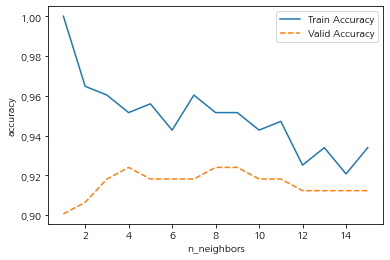

In [55]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

In [56]:
n_neighbors = 4

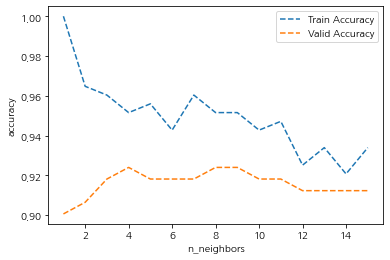

In [57]:
#모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "--", label = "Train Accuracy")
plt.plot(para_n_neighbors, valid_accuracy, linestyle = "--", label = "Valid Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [58]:
# train 및 valid 정확도 결과 저장용
train_accuracy = []
valid_accuracy =[]
#이웃 수
para_n_neighbors = [i for i in range(1,11)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["ValidAccuracy"] = valid_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.965,0.906
2,3,uniform,0.960,0.918
3,4,uniform,0.952,0.924
4,5,uniform,0.956,0.918
5,6,uniform,0.943,0.918
6,7,uniform,0.960,0.918
7,8,uniform,0.952,0.924
8,9,uniform,0.952,0.924
9,10,uniform,0.943,0.918


In [59]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'ValidAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidAccuracy_distance,ValidAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


In [60]:
## train 및 정확도 결과 저장용
train_accuracy=[];valid_accuracy=[]

## 이웃수
para_n_neighbors = [i for i in range(1,11)]*3

## 거리계산 방법 (minkowki,euclidean,manhattan )
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))
    
    
# 데이터 테이블 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["ValidAccuracy"] = valid_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValidAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.965,0.906
2,3,minkowski,0.960,0.918
3,4,minkowski,0.952,0.924
4,5,minkowski,0.956,0.918
5,6,minkowski,0.943,0.918
6,7,minkowski,0.960,0.918
7,8,minkowski,0.952,0.924
8,9,minkowski,0.952,0.924
9,10,minkowski,0.943,0.918


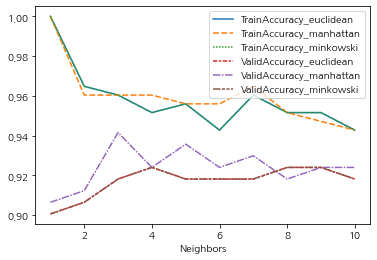

In [61]:
#정확도 그래프
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","ValidAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [62]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("test data accuracy:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.952
test data accuracy:0.936
Confusion matrix:
[[103   2]
 [  9  57]]


# 결론

- 꽤 괜찮은 성능을 보이며, 활용할 수 있을 것으로 판단된다. test set에서 93.6%의 높은 정확도를 보인다. 또한, 우리가 주목해야 할 부분은 바로 Confusion Matrix 중에서도 실제로 0(악성)이지만, 1(양성)으로 판단한 비율이 2/103 = 0.02(=2%)이다. 따라서 100%는 아니지만, 암 진단에 사용되도 괜찮은 모델로 판단된다. 
  
- 정밀도(precision) : 예측 긍정(참)에서 실제 긍정(참)의 비율 (TP/(TP+FP))
- 재현율(recall) : 실제 긍정(참)에서 예측 긍정(참)의 비율 (TP/(TP+FN))

하지만, 실제로는 양성(1)인데, 악성(0)으로 판단할 확률이 7/59 = 0.158(=15.8%)로, 악성이 아닌데도 악성으로 판단될 확률이 높으므로 완벽한 모델은 아님을 할 수 있다.